<a href="https://colab.research.google.com/github/FLjv77/Quantum_ML_Course/blob/main/codes/quantum_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Installations

In [1]:
pip install pennylane --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 62.6 MB/s eta 0:00:00


###Imports

In [2]:
import pennylane as qml
import numpy as np
import matplotlib as plt

/usr/local/lib/python3.11/dist-packages/pennylane/capture/capture_operators.py:33: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.4.28. You have version 0.5.2 installed. Please downgrade JAX to <=0.4.28 to avoid runtime errors.
  warnings.warn(


###Utilites

In [4]:
dev = qml.device("default.mixed", wires=1)

def print_density_matrix(description, qnode):
    rho = qnode()
    print(f"\n{description}")
    print(np.round(rho, 3))

###Amplitude Damping
moves toward classical ∣0⟩, but with residual coherence depending on 𝑝


In [9]:
dev = qml.device("default.mixed", wires=1)

@qml.qnode(dev)
def amp_damping():
    qml.Hadamard(wires=0)
    qml.AmplitudeDamping(0.5, wires=0)
    return qml.density_matrix(wires=0)

print_density_matrix("Amplitude Damping (p=0.5)", amp_damping)



Amplitude Damping (p=0.5)
[[0.75 +0.j 0.354+0.j]
 [0.354+0.j 0.25 +0.j]]


###Phase Damping
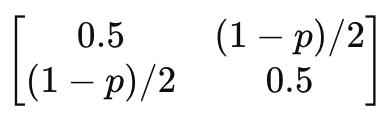

In [11]:
@qml.qnode(dev)
def phase_damping():
    qml.Hadamard(wires=0)
    qml.PhaseDamping(0.3, wires=0)
    return qml.density_matrix(wires=0)

print_density_matrix("Phase Damping (p=0.7)", phase_damping)



Phase Damping (p=0.7)
[[0.5  +0.j 0.418+0.j]
 [0.418+0.j 0.5  +0.j]]


###Depolarizing Channel


In [25]:
@qml.qnode(dev)
def depolarizing():
    qml.Hadamard(wires=0)
    qml.DepolarizingChannel(0.99, wires=0)
    return qml.density_matrix(wires=0)

print_density_matrix("Depolarizing Channel (p=0.8)", depolarizing)



Depolarizing Channel (p=0.8)
[[ 0.5 +0.j -0.16+0.j]
 [-0.16+0.j  0.5 +0.j]]
